In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 15 ##

## Probability ##

In [ ]:
# Discussion Question (a):
# P(Rick and Morty both appear)


In [ ]:
# Discussion Question (b)
# P(neither Rick nor Morty appears)


## Random Sampling ##

In [ ]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

In [ ]:
united.where('Destination', 'JFK') 

In [ ]:
united.take(np.arange(0, united.num_rows, 1000))

In [ ]:
united.take(make_array(34, 6321, 10040))

In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

## Distributions ##

In [ ]:
die = Table().with_column('Face', np.arange(1, 7))
die

In [ ]:
die.sample(10)

In [ ]:
die.hist()

In [ ]:
roll_bins = np.arange(0.5, 6.6, 1)

In [ ]:
die.hist(bins=roll_bins)

In [ ]:
die.sample(10).hist(bins=roll_bins)

In [ ]:
die.sample(1000).hist(bins=roll_bins)

In [ ]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

In [ ]:
united 

In [ ]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [ ]:
min(united.column('Delay'))

In [ ]:
max(united.column('Delay'))

In [ ]:
np.average(united.column('Delay'))

In [ ]:
united.sample(10).hist('Delay', bins = united_bins)

In [ ]:
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [ ]:
np.median(united.column('Delay'))

In [ ]:
np.median(united.sample(10).column('Delay'))

In [ ]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [ ]:
sample_median(10)

In [ ]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [ ]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Large Random Samples

In [3]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

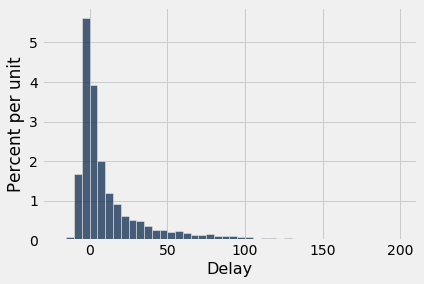

In [4]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

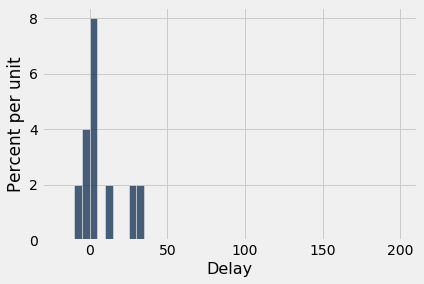

In [5]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

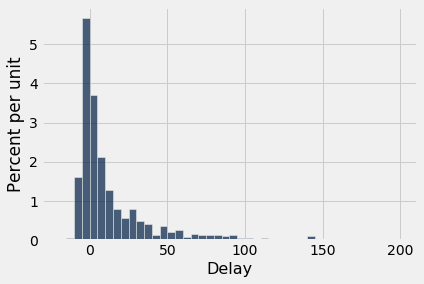

In [6]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [7]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [8]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

12.0

In [9]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

3.0

### Probability & Empirical Distributions of a Statistic

In [10]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [11]:
sample_median(10)

3.5

In [12]:
num_simulations = 2000

In [13]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

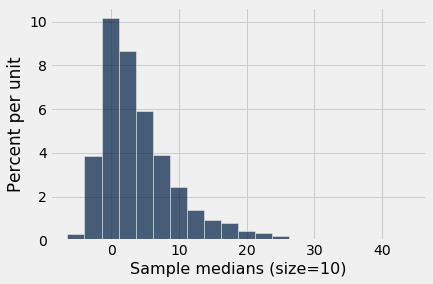

In [14]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [15]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

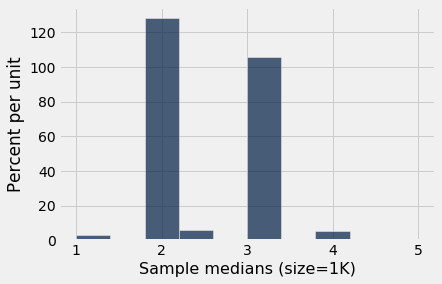

In [16]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

#### Empirical Distributions Overlayed

In [17]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [18]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

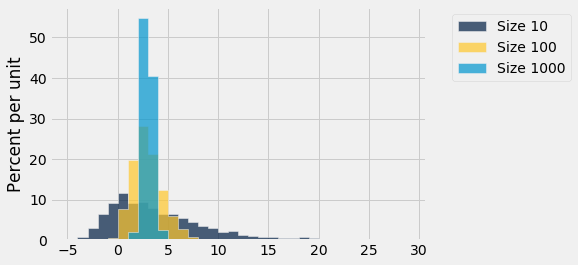

In [19]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [20]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [21]:
sample_proportions(100, population_proportions)

array([0.26, 0.74])

In [22]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [23]:
panel_proportion()

0.28

In [24]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

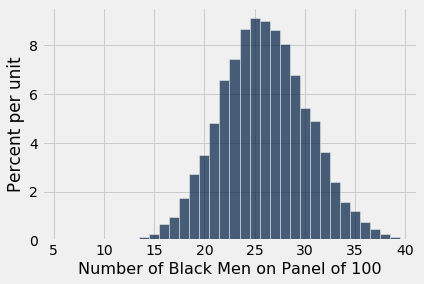

In [25]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Mendel and Pea Flowers ##

In [26]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [27]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.75672766, 0.24327234])

In [28]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [29]:
purple_flowers()

74.59634015069967

In [30]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

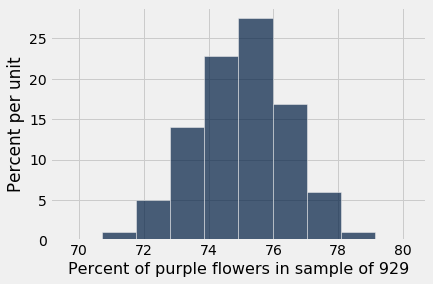

In [31]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

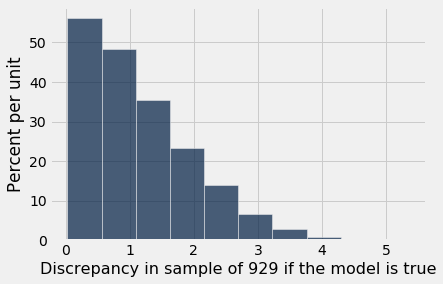

In [32]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [33]:
abs(observed_purples * 100 - 75)

1.318622174381062

## Alameda County Jury Panels ##

In [7]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


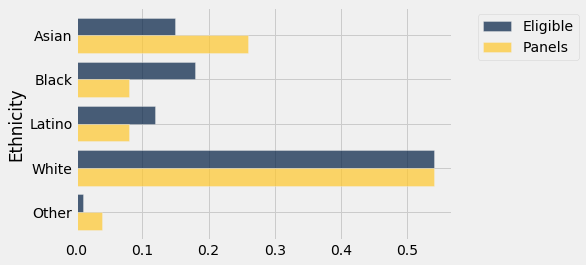

In [8]:
jury.barh('Ethnicity')

In [9]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [10]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.14476458, 0.18692902, 0.1208714 , 0.53689389, 0.01054111])

In [11]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.144765
Black,0.18,0.08,0.186929
Latino,0.12,0.08,0.120871
White,0.54,0.54,0.536894
Other,0.01,0.04,0.0105411


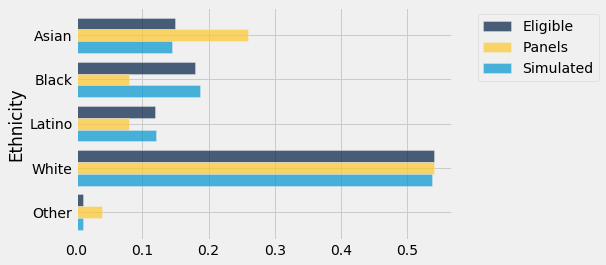

In [12]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [13]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [14]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [15]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [16]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.014884047786366872

In [17]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


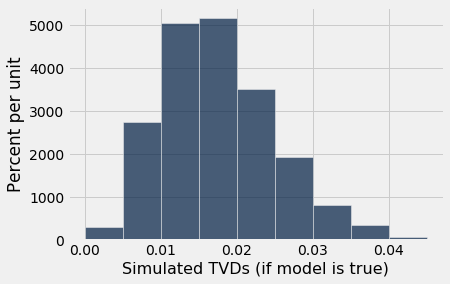

In [18]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

## The GSI's Defense ##

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
observed_average = 13.6667 

In [6]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
4,14
8,15
1,22
9,17
8,7
6,16
9,4
9,21
3,16
5,13


In [7]:
np.average(random_sample.column('Midterm'))

14.814814814814815

In [8]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [9]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

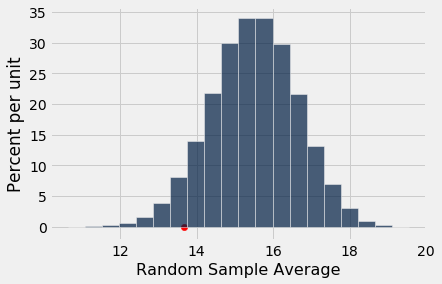

In [10]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [11]:
sum(sample_averages <= observed_average) / 50000

0.05682

In [12]:
# 5% of 50,000 = 2500

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.592592592592593

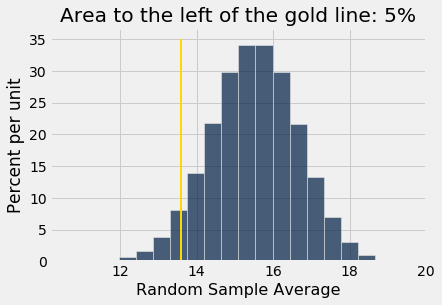

In [13]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');